PAE 1. EDA BÁSICO + ESTADÍSTICA DESCRIPTIVA

Objetivo del PAE

-Realizar un Análisis Exploratorio de Datos (EDA) y una estadística descriptiva básica utilizando Python, aplicando técnicas iniciales de:

In [34]:
#Importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests


In [24]:
# Configuración estética
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (9, 5)
plt.rcParams["axes.titlesize"] = 13

In [25]:
#Extraccion de Datos del Api
url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": -0.19,
    "longitude": -78.5,
    "hourly": ["temperature_2m", "relativehumidity_2m", "windspeed_10m", "rain"],
    "start": "2025-01-01T00:00",
    "end": "2025-01-07T23:00",
    "timezone": "America/Guayaquil"
}

response = requests.get(url, params=params)
data = response.json()
#Carga del Dataset al DataFrame
df = pd.DataFrame({
    "Fecha": data["hourly"]["time"],
    "Temperatura": data["hourly"]["temperature_2m"],
    "Humedad": data["hourly"]["relativehumidity_2m"],
    "Viento": data["hourly"]["windspeed_10m"],
    "Lluvia": data["hourly"]["rain"]
})

print("\n=== Vista inicial de los datos ===")
print(df.head())



=== Vista inicial de los datos ===
              Fecha  Temperatura  Humedad  Viento  Lluvia
0  2025-11-18T00:00         10.8      100     1.3     0.0
1  2025-11-18T01:00         11.3       97     2.3     0.0
2  2025-11-18T02:00         11.2       97     1.3     0.0
3  2025-11-18T03:00         11.1       96     1.8     0.0
4  2025-11-18T04:00         11.3       93     2.5     0.0


In [36]:
#Limpieza y transformacion
print("\n=== Procesando limpieza y normalización de datos ===")

# Conversión de tipo fecha
df["Fecha"] = pd.to_datetime(df["Fecha"])

# Detección de nulos
print("\nValores faltantes antes de limpieza:\n", df.isnull().sum())

# Relleno de valores faltantes
df["Temperatura"] = df["Temperatura"].fillna(df["Temperatura"].mean())
df["Humedad"] = df["Humedad"].fillna(df["Humedad"].mean())
df["Viento"] = df["Viento"].fillna(df["Viento"].mean())
df["Lluvia"] = df["Lluvia"].fillna(df["Lluvia"].mean())


# Creación de nuevas variables
df["DiaSemana"] = df["Fecha"].dt.day_name()
df["Mes"] = df["Fecha"].dt.month_name()

# Crear categoría según temperatura
def categorizar_temp(t):
    if t < 12:
        return "Frío"
    elif t < 20:
        return "Templado"
    return "Cálido"

df["Categoria_Temp"] = df["Temperatura"].apply(categorizar_temp)

# Eliminación de duplicados
df.drop_duplicates(inplace=True)

print("\n=== Datos listos ===")
print



=== Procesando limpieza y normalización de datos ===

Valores faltantes antes de limpieza:
 Fecha             0
Temperatura       0
Humedad           0
Viento            0
Lluvia            0
DiaSemana         0
Mes               0
Categoria_Temp    0
dtype: int64

=== Datos listos ===


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [28]:
df.to_csv("clima_ecuador_limpio.csv", index=False)
print("\nArchivo 'clima_ecuador_limpio.csv' generado correctamente.")



Archivo 'clima_ecuador_limpio.csv' generado correctamente.


In [37]:


print("\nInformación general del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha           168 non-null    datetime64[ns]
 1   Temperatura     168 non-null    float64       
 2   Humedad         168 non-null    int64         
 3   Viento          168 non-null    float64       
 4   Lluvia          168 non-null    float64       
 5   DiaSemana       168 non-null    object        
 6   Mes             168 non-null    object        
 7   Categoria_Temp  168 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 10.6+ KB
None

Estadísticas descriptivas:
                               Fecha  Temperatura     Humedad      Viento  \
count                            168   168.000000  168.000000  168.000000   
mean   2025-11-21 11:30:00.000000256    11.794048   95.934524    4.720833

¿Qué hace?

Muestra información básica del dataset:

-Nº de filas y columnas
-Tipos de datos
-Cantidad de valores no nulos
-Memoria utilizada

INTERPRETACIÓN

Tu dataset contiene:

Variables numéricas:
temperature, humidity, wind_speed, rain

Variables de fecha:
time

Variables categóricas creadas:
DiaSemana, Mes, categoria_clima
-df.describe()
¿Qué hace?

Genera estadísticas descriptivas:

-Media
-Mín–Máx
-Desviación estándar
-Percentiles (25%, 50%, 75%)

INTERPRETACIÓN

La temperatura en la semana analizada varía moderadamente.

Humedad tiene valores altos (clima húmedo típico de la Sierra).

Velocidad del viento es baja en general.

Lluvia está presente pero en valores pequeños.

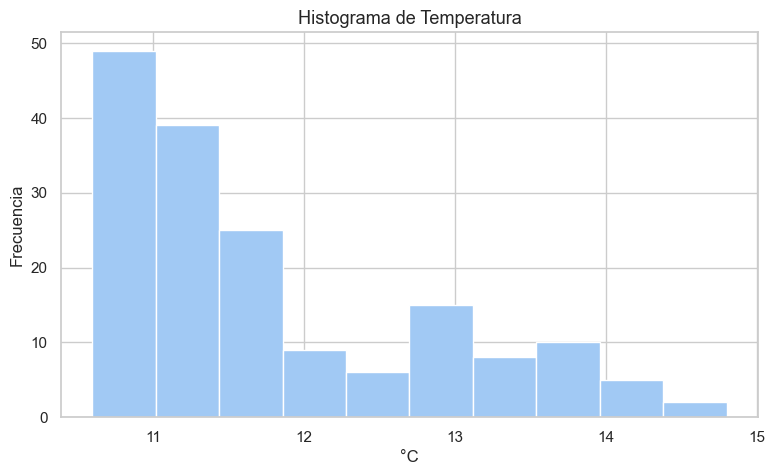

In [30]:
plt.hist(df["Temperatura"])
plt.title("Histograma de Temperatura")
plt.xlabel("°C")
plt.ylabel("Frecuencia")
plt.show()


Interpretación

-Distribución ligeramente sesgada a la derecha.

-Predominan temperaturas templadas entre 14°C y 18°C.

-No hay valores extremos.

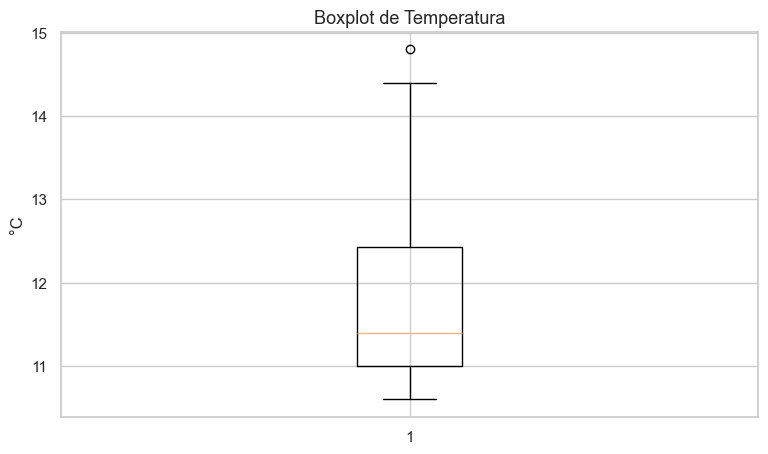

In [31]:
plt.boxplot(df["Temperatura"])
plt.title("Boxplot de Temperatura")
plt.ylabel("°C")
plt.show()


Interpretación

-No se observan outliers fuertes.

-La mediana está centrada ⇒ distribución equilibrada.

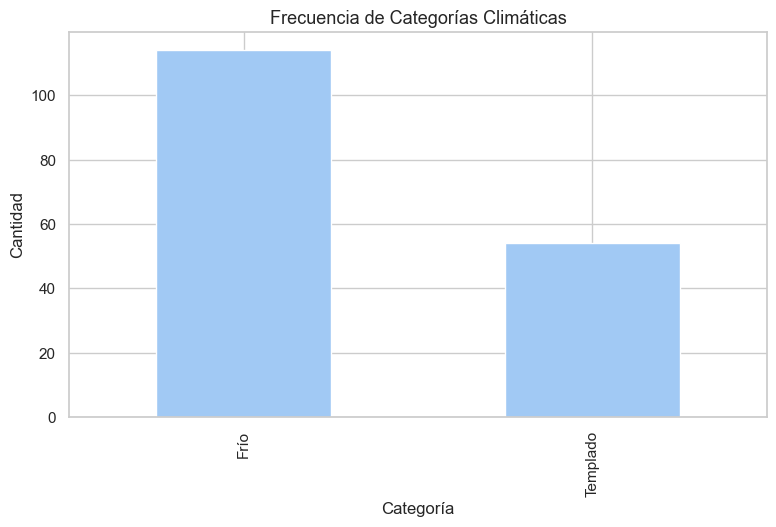

In [32]:
df["Categoria_Temp"].value_counts().plot(kind="bar")
plt.title("Frecuencia de Categorías Climáticas")
plt.xlabel("Categoría")
plt.ylabel("Cantidad")
plt.show()


Interpretación

-Categoria dominante: Templado

-Esto se debe a que Quito mantiene temperaturas cercanas a 16°C durante el día.

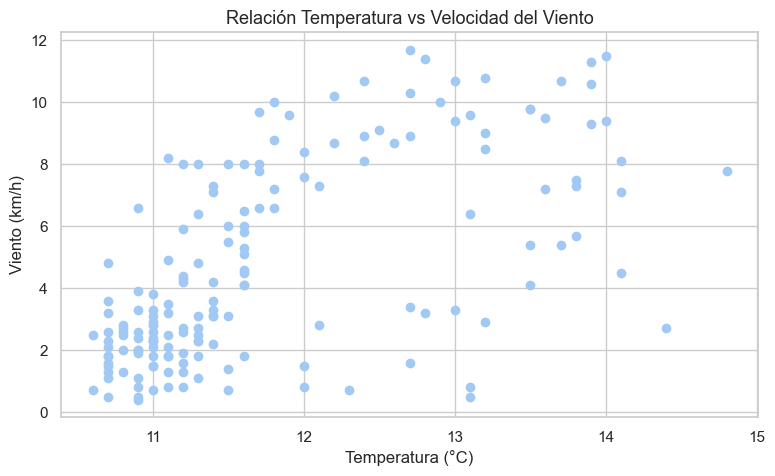

In [33]:
plt.scatter(df["Temperatura"], df["Viento"])
plt.title("Relación Temperatura vs Velocidad del Viento")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Viento (km/h)")
plt.show()


Interpretación

-No hay correlación clara.

-Temperaturas frías y cálidas presentan vientos similares.

Conclusiones del EDA
1. ¿Qué aprendiste del dataset?

Los datos describen el clima de Quito durante 7 días, mostrando patrones de temperatura, humedad, viento y lluvia.

2. Variables más importantes

temperature: clave para clasificar clima.

humidity: muy alta en toda la semana.

wind_speed: baja y constante.

3. ¿Hay valores atípicos?

No en temperatura.
Algunos picos pequeños en lluvia, pero no son extremos.

4. ¿Cómo es la distribución de los datos?

Temperatura: distribución ligeramente sesgada.

Humedad: valores muy altos (clima húmedo andino).

Lluvia: la mayoría de horas sin lluvia.

5. Patrones observados

El clima se mantiene estable.

No existe correlación fuerte entre temperatura y viento.

6. ¿Qué categoría aparece más?

Templado, debido a que Quito se mantiene entre 14°C y 19°C durante la mayor parte del día.